# RNN in Python
In this colab notebook, you will get to know how various types of RNNs implemented. Feel free to experiment and also keep an eye on number of paramters shown in the model summary, try calculating it on your own.

In [1]:
# import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU
from tensorflow.keras.layers import TimeDistributed, RepeatVector, Bidirectional

In [87]:
# define parameters
n_output = 3 # number of classes in case of classification, 1 in case of regression
output_activation = "sigmoid" # “softmax” or “sigmoid” in case of classification, “linear” in case of regression

## First, let's look at how to build a vanilla RNN in Keras. We will be using Simple RNN to build sample models for different types but you may replace it by GRU or LSTM without changing anything else.

In [88]:
vanilla_model = Sequential()

# add the first hidden layer
n_cells = 5 # number of cells to add in the hidden layer
time_steps = 10 # length of sequences
features = 2 # #INPUT number of features of each entity in the sequence

vanilla_model.add(SimpleRNN(n_cells, 
                            input_shape=(time_steps, features)))

# add output layer
vanilla_model.add(Dense(n_output, 
                        activation=output_activation))

Number of input weights = Number of input features * Number of RNN units
      = 4 * 5 = 20 

Number of recurrent weights = Number of RNN units * Number of RNN units
                = 5 * 5 = 25

Number of biases = Number of RNN units = 5

Number of output layer weights = Number of RNN units * Number of output nodes
                   = 5 * 4 = 20

Number of biases = Number of output nodes
             = 4

In [89]:
vanilla_model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_35 (SimpleRNN)   (None, 5)                 40        
                                                                 
 dense_31 (Dense)            (None, 3)                 18        
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


* Input :   4 input weights, 4 recurrerent weights(feeding back h1 and h2),  2 bias = 10 input params

* Output:  4 output weights, 2 bias = 6 output params

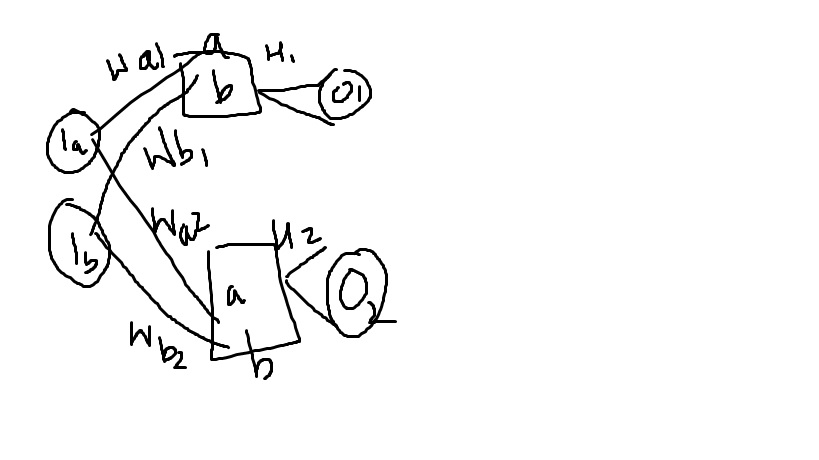

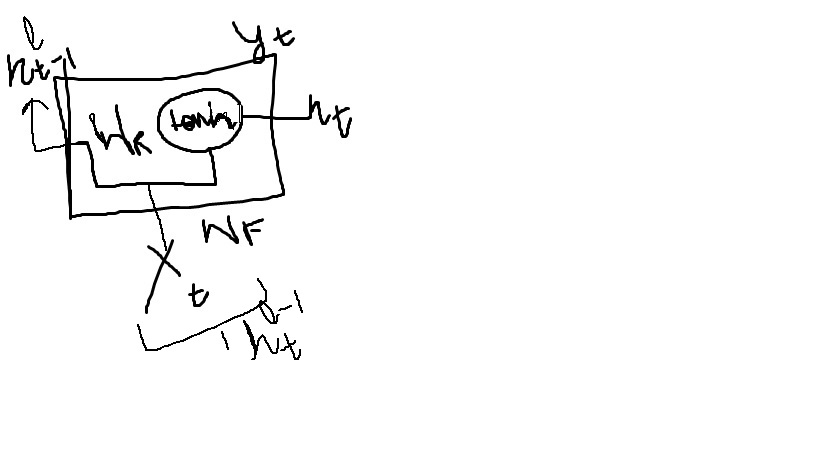

Let's also learn to build multi-layer RNN model with two hidden RNN layers.

In [79]:
multilayer_model = Sequential()

# add the first hidden layer
n_cells = 5 # number of cells to add in the hidden layer
time_steps = 10 # length of sequences
features = 4 # number of features of each entity in the sequence

multilayer_model.add(SimpleRNN(n_cells, input_shape=(time_steps, features), return_sequences=True))

multilayer_model.add(SimpleRNN(n_cells, input_shape=(time_steps, features)))

# add output layer
multilayer_model.add(Dense(n_output, activation=output_activation))

In [80]:
multilayer_model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_31 (SimpleRNN)   (None, 10, 5)             50        
                                                                 
 simple_rnn_32 (SimpleRNN)   (None, 5)                 55        
                                                                 
 dense_28 (Dense)            (None, 4)                 24        
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


## Let's look at how to build a many-to-one architecture in Keras.

<center>

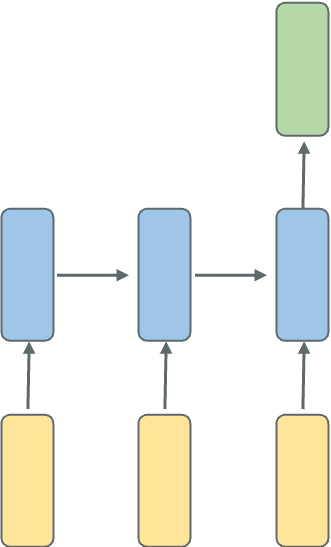

In [19]:
# instantiate model
m2o_model = Sequential()

# time_steps: multiple input, that is, one input at each timestep
# A normal implementation returns only the RNN output at last time step and it is defined by the return_sequences, which is False by default.
# In order to get output at each time step, you need to set return_sequences=True
# Hence this is a many-to-one RNN model.
m2o_model.add(SimpleRNN(n_cells, input_shape=(time_steps, features)))

# single output at output layer
m2o_model.add(Dense(n_output, activation=output_activation))

In [20]:
m2o_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 5)                 50        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 24        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


1. Let's look at how to build a many-to-many (with equal length of input and output sequences) architecture in Keras. TimeDistributed() funcion allows the dense layer to access output at each time step one by one.

2. If you remove the Timedistributed() function and use plain dense layer as we did previously in many-to-one, the dense layer will be applied only at the last time step and get inputs of all the time steps at once. For example Sentiment analysis where you just need to apply dense layer once at the last time step.

3. Where as in many-to-many RNN, Timedistributed() makes sure that dense layers gets applied on RNN outputs at each time step. Hence dense layer is active here at each time step. For example POS tagger where you need to have a dense layer at each time step.

<center>

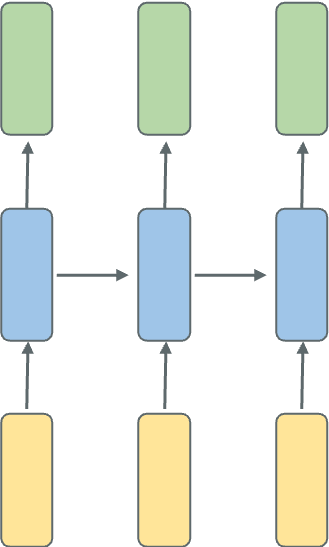

In [21]:
# instantiate model
m2m_model = Sequential()

# time_steps: multiple input, that is, one input at each timestep
# return_sequences=True returns all the outputs processed by RNN
m2m_model.add(SimpleRNN(n_cells, input_shape=(time_steps, features), return_sequences=True))

# TimeDistributed(): This function is used when you want your neural network 
# to provide an separate output at each timestep which is exactly what we want in the many-to-many RNN model.
m2m_model.add(TimeDistributed(Dense(n_output, activation=output_activation)))

In [22]:
m2m_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_8 (SimpleRNN)     (None, 10, 5)             50        
_________________________________________________________________
time_distributed (TimeDistri (None, 10, 4)             24        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


## Let's look at how to build a one-to-many RNN in Keras.

<center>

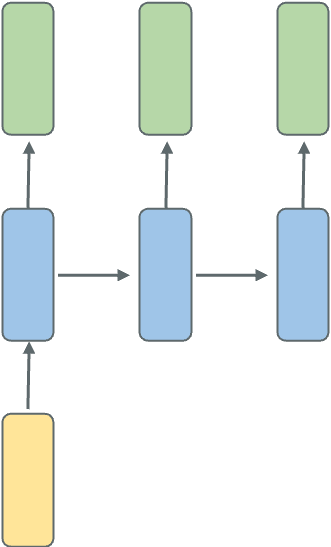

In [26]:
# instantiate model
o2m_model = Sequential()

# time_steps is one in this case because the input consists of only one entity
o2m_model.add(SimpleRNN(n_cells, input_shape=(1, features), return_sequences=True))

# TimeDistributed(): multiple outputs at the output layer
o2m_model.add(TimeDistributed(Dense(n_output, activation=output_activation)))

In [27]:
o2m_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_11 (SimpleRNN)    (None, 1, 5)              50        
_________________________________________________________________
time_distributed_2 (TimeDist (None, 1, 4)              24        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


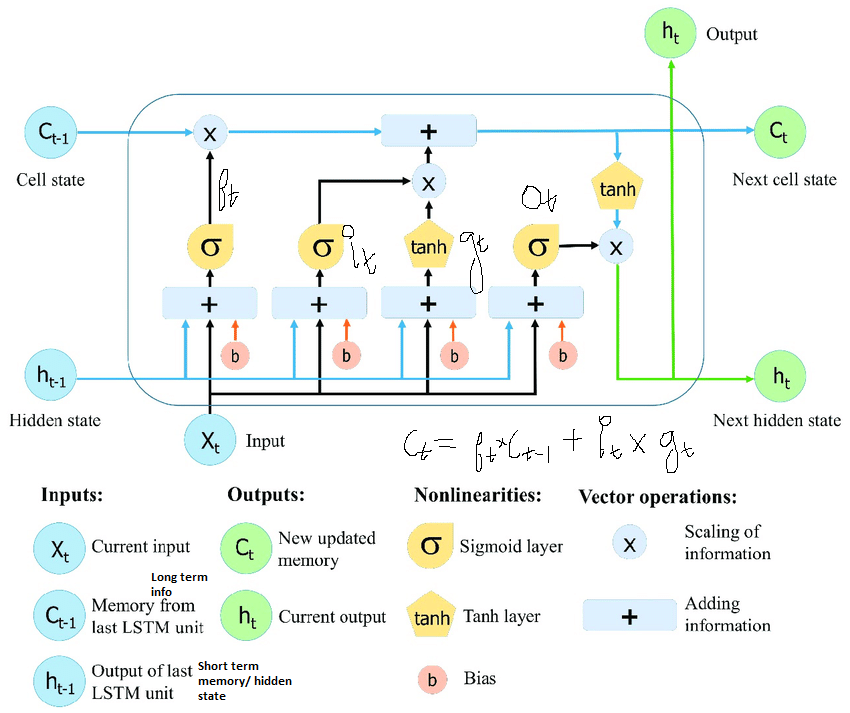
## Let's see how to build LSTM networks in Keras.

In [23]:
time_steps = 100 #seq len
n_cells = 2 #num units are outputs from LSTM hidden layer
features = 1 #input sequences from LSTM network 

n_output = 1
output_activation = "sigmoid" 
# instantiate model
lstm_model = Sequential()

# replace the SimpleRNN() layer with LSTM() layer
lstm_model.add(LSTM(n_cells, 
                    input_shape=(time_steps, features)))

# output layer
lstm_model.add(Dense(n_output, activation=output_activation))

- Whf, Whi, Whg, Who,
- Wxf, Wxi, Wxg, Wxo,
- bf, bi, bg, bo,

- Input Weights : Layers * features * units
- recurrent Weights  : Layers * units * units
- biases : Layers * units
- Total = Input Weights + recurrent Weights + biases 

In [24]:
lstm_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 2)                 32        
                                                                 
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


## Let's see how to build GRU networks in Keras

In [28]:
time_steps = 100 #seq len
n_cells = 1 #num units are outputs from LSTM hidden layer
features = 1 #input sequences from LSTM network 

n_output = 1
output_activation = "sigmoid" 

# instantiate model
gru_model = Sequential()

# replace the LSTM() layer with GRU() layer
gru_model.add(GRU(n_cells, 
                  input_shape=(time_steps, features)))

# output layer
gru_model.add(Dense(n_output, activation=output_activation))

* Layers in GRU is 3
- Input weights = layers* features* units 
- recurent weights = layers* units* units 
- biase = layers* 2 * units 

In [29]:
gru_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 1)                 12        
                                                                 
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
